**Support vector machine** là một mô hình học máy mạnh mẽ và linh hoạt, có khả năng linear hoặc non-linear classification, regression, thậm chí là phát hiện mới. SVM hoạt động rất tốt với các tập dữ liệu vừa và nhỏ (vài trăm đến vài nghìn instances), đặc biệt với các task phân loại. Tuy nhiên, nó không scale tốt với các tập dữ liệu rất lớn

In [7]:
import matplotlib.pyplot as plt

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [8]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear SVM Classification

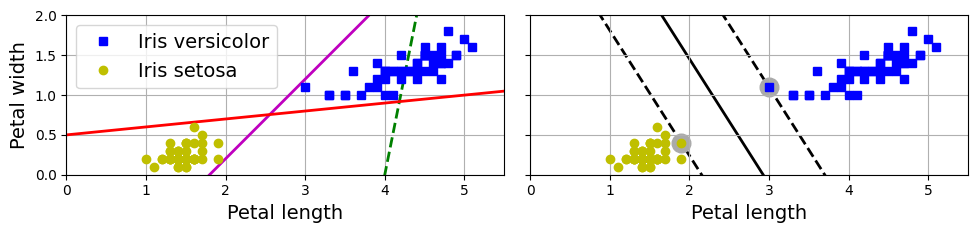

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # type: ignore
y = iris.target # type: ignore

setosa_or_vesicolor = (y == 0) | (y == 1)
X = X[setosa_or_vesicolor]
y = y[setosa_or_vesicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2]) # type: ignore
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2]) # type: ignore
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

Theo hình train ta thấy những điểm dữ liệu là *linear separable*. Hình bên trái thể hiện decision boundaries của 3 classifiers. Mô hình có decision boundary được biểu diễn bằng đường đứt nét tệ đến mức nó thậm chí không phân tách các lớp một cách chính xác. Hai model còn lại làm việc tốt với training set nhưng decision boundary của chúng quá gần với các instance nên model có thể sẽ không hoạt động tốt với các instances mới.

Ngược lại, đường nét liền trong biểu đồ bên phải biểu diễn decision boundary của classifier SVM; đường này không chỉ phân tách hai lớp mà còn giữ khoảng cách xa nhất có thể với các trường hợp đào tạo gần nhất. Có thể nghĩ SVM classifier nằm  trong khoảng giữa 2 đường nét đứt (gọi là *large margin classification*)

Thêm các instances ngoài khoảng tạo bời 2 đường đứt (off the street) sẽ không ảnh hưởng tới decision boudaries, các ranh giới này được xác định (hoặc "support") với các instances nằm trên cạnh của nó gọi là **support vector** (được khoanh tròn ở trên)

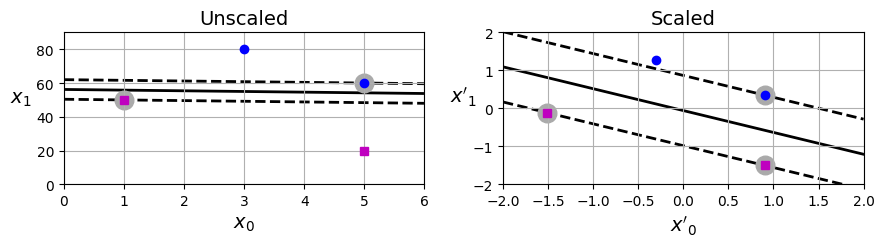

In [10]:
# extra code – this cell generates and saves Figure 5–2

from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90]) # type: ignore
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2]) # type: ignore
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")
plt.show()

**Lưu ý: SVM rất nhạy cảm với `feature scale` ở bên ảnh trái trục dọc lớn hơn nhiều so với trục ngang, độ rộng street (khoảng cách giữa 2 đường đứt) sẽ nhỏ hơn và gần với đường ngang, sau khi thực hiện biến đổi ta được biểu đồ bên phải trông có vẻ đẹp hơn**

## Soft Margin Classification

Nếu chúng ta muốn áp đặt một perfect classification, nó được gọi là **hard margin classification**. Có 2 vấn đề chính

- Nó chỉ khả thi nếu dữ liệu **linearly separable**
- Rất nhạy cảm với nhiễu

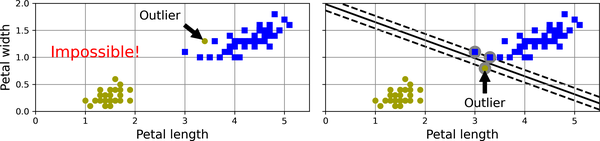

Cần phải sử dụng các mô hình linh hoạt hơn. Mục tiêu là tìm ra sự cần bằng giữa việc giữ cho street lớn nhất có thể (các vạch đứt gần với từng cụm nhất có thể) và hạn chế các **margin violation**. Nó được gọi là **soft margin classification**

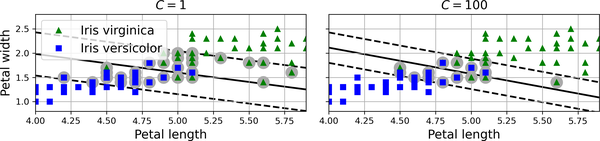

Khi sử dụng SVM trong scikit-learn cần hiệu chỉnh một vài hyperparameter. ví dụ trên hình C nhỏ có thể làm street lớn nhưng có nhiều margin violations hơn, mặt khác giảm C dẫn đến nhiều instances support street hơn làm giảm overfitting, nhưng nếu nhiều quá có thể dẫn đến underfitting như ví dụ ở trên

In [11]:
# trains a linear SVM classifier to detect Iris virginica flowers

from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # type: ignore
y = (iris.target == 2) # type: ignore

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [12]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)


array([ True, False])

In [13]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

# Nonlinear SVM Classification

Một SVM classifiers hiệu quả và thường hoạt động rất tốt, nhiều tập dữ liệu thậm chí còn không gần với linearly separable. Một cách tiếp cận để xử lí các nonlinear datasets là thêm các feature. Ví dụ như các feature polynomial, trong một số trường hợp điều này có thể dẫn đến một dataset linearly separable

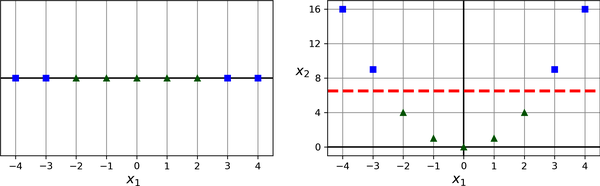

Ví dụ: hình bên trái chỉ có một feature $x_1$ và không linearly separable, thêm feature $x_2 = x_1^2$ là được hình bên trái và đã được 1 dataset linearly separable

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2) # type: ignore
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1) # type: ignore

In [15]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [16]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, random_state=42, max_iter=10_000)
)

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

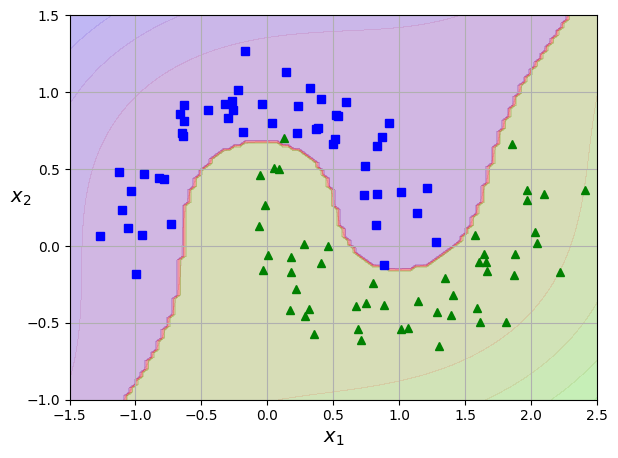

In [17]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

Việc thêm các polynomial features có thể thực hiện một các đơn giản và hoạt động tốt với các thuật toán ML (không chỉ SVM). Tuy nhiên, nếu thêm vào ít sẽ không thể giải quyết được các datasets phức tạp, tuy nhiên nếu thêm nhiều thì sẽ tạo ra một số lượng lớn các features, có thể làm mô hình rất chậm.

Khi sử dụng SVM có thể áp dụng một kĩ thuật toán học để giải quyết vấn đề này gọi là `kernel trick`. Kernel trick giúp ta có thể có được kết quả tương tự khi thêm nhiều polynomial features, thậm chí với bậc rất cao mà không thực sự phải thêm chúng vào.

In [18]:
# test kernel trick with moon datasets

from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

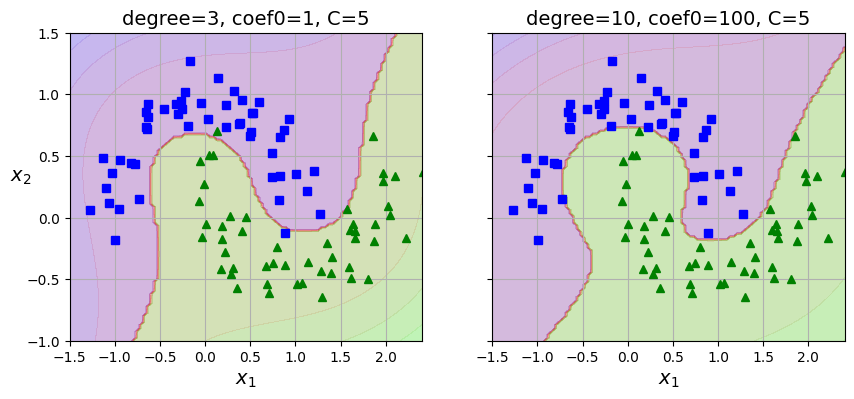

In [19]:
from numpy import poly


poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=10, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

Nếu mô hình bị overfittingm ta có thể thử giảm `degree` và ngược lại. Hyperparameter `coef0` kiếm soát mức độ mô hình bị ảnh hưởng bởi các feature bậc cao và thấp

## Similarity Features

Một kỹ thuật khác để giải quyết vấn đề nonlinear là thêm các features được tính toán bằng similarity function (hàm tương tự), đo mức độ giống nhau của trừng instance với một mốc cụ thể



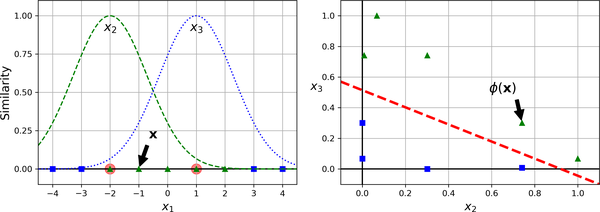

Ví dụ: từ bộ dữ liêu 1 chiều thêm 2 mốc $x_1=-2$ và $x_1=1$. Chúng ta sẽ định nghĩa `similarity function` là `RBF Gaussian` với $\gamma = 0.3$, tức là hàm hình chuông thay đổi từ 0 (rất xa điểm mốc) đến 1 (tại điểm mốc). Tại hình trên instance $x_1=-1$ nó cách mốc đầu tiên 1 và mốc thứ hai là 2. Do đó các feature mới là $x_2=\operatorname{exp}(-0.3 \times 1^2) \approx 0.74$ và $x_3=\operatorname{exp}(-0.3 \times 2^2) \approx 0.30$. Hình bên phải cho thấy tập dữ liệu đã được chuyển đổi (bỏ feature gốc tức là $x_1$), và nó đã linear separable

**Làm thế nào để chọn điểm mốc ?**

Cách tiếp cận đơn giản nhất là tạo điểm mốc tại từng instance trong dataset. Làm như vậy sẽ tạo ra nhiều chiều và do đó sẽ làm tăng khả năng training set sau khi biến đổi là linearly separable.

Nhược điểm là nếu training set là tập có `m` instance và `n` features thì sẽ được chuyển đổi thành `m` instance và `m` features (giả sử đã bỏ đi các feature gốc). Nếu dataset lớn, ta sẽ có một tập features lớn tương đương

## Gaussian RBF Kernel

Giống như `Polinomial feature`, `similarity features` cũng rất hữu ích với bất kỳ thuật toán ML nào, nhưng độ phức tạp lớn để tính toán tất cả các features được thêm vào (đặc biệt với các training set lớn). `Gaussian RBF kernel` cũng là một thủ thuật giúp chúng ta có kết quả như thêm các feature nhưng không thực sự làm như vậy

In [20]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

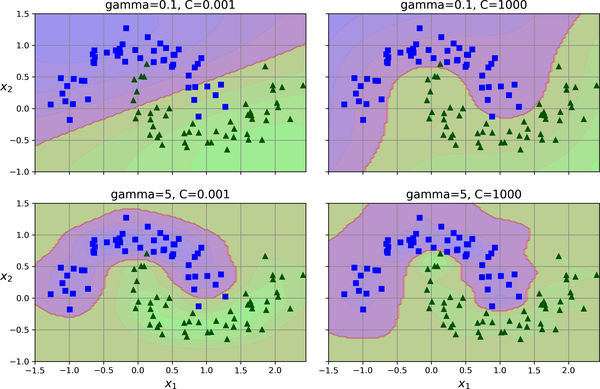

Tăng gamma làm cho đường cong hình chuông hẹp hơn. Do đó, phạm vi ảnh hưởng của mỗi instance nhỏ hơn: decision boundary cuối cùng trở nên bất thường hơn, dao động quanh các trường hợp riêng lẻ.

Ngược lại với gamma nhỏm các instance có phạm vi ảnh hưởng lớn hơn và decision boundary mượt mà hơn.

$\Rightarrow$ gamma hoạt động như một regularization hyperparameter, nếu mô hình overfitting thì giảm, underfitting thì tăng.

**Còn một vài các loại kernel khác nhưng ít khi được sử dụng**

## SVM Classes and Computational Complexity

`LinearSVC` dựa trên thư viện $liblinear$, thư viện này triển khai một thuật toán được tối ưu cho linear SVMs. Nó không hỗ trợ kernel trick, nhưng nó được mở rộng gần như tuyến tính với số lượng training instances và số lượng features. Độ phức tạp đào tạo của nó xấp xỉ $O(m \times n)$. Sẽ mất thời gian hơn nếu yêu cầu độ chính xác cao. Nó được điều khiển bởi hyperparameter $\epsilon$ (dung sai, gọi là `tol` trong Scikit-learn)

`SVC` dựa trên thư viện $libsvm$, nó triển khai một thuật toán hỗ trợ kernel trick. Thời gian huấn luyện thường trong khoảng $O(m^2 \times n)$ và $O(m \times n)$. Nó sẽ cực kỳ chậm khi training set lớn (vài trăm nghìn mẫu), vì vậy nó hoạt động tốt nhất cho bộ dữ liệu vừa và nhỏ. Nó có khả năng mở rộng tốt theo số lượng features, đặc biệt là với sparse featues. Trong trường hợp này. Trong trường hợp này, thuật toán sẽ mở rộng theo số lượng trung bình các tính năng khác không trên mỗi trường hợp.

`SGD Classifier` cũng thực hiện phân loại large margin theo mặc định và các hyperparameter của nó - đặc biệt là các regularization hyperparameters (`alpha` và `penalty`) và `learning_rate` có thể được chỉnh sửa để có kết quả tương tự với linear SVMs. Để đào tạo nó sử dụng SGD, cho phép học gia tăng và tốn ít bộ nhớ do đó bạn có thể sử dụng nó để đào tạo một mô hình trên một tập dữ liệu lớn không vừa với RAM (out-of-core). Hơn nữa, nó có khả năng mở rộng rất tốt, vì độ phức tạp tính toán của nó là $O(m \times n)$

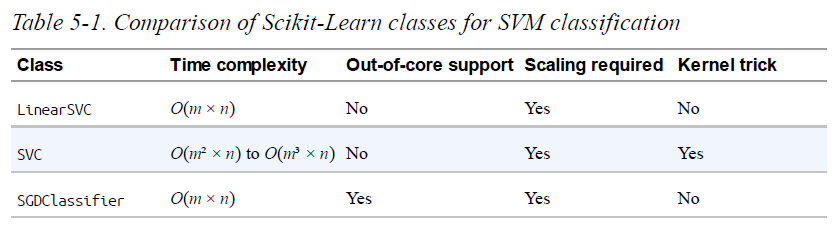

# SVM Regression

Để sử dụng SVMs cho regression thay vì classification: thay vì cố gắng đưa street lớn nhất có thể vào giữa 2 lớp trong khi hạn chê margin violations. SVM Regression cố gắng fit càng nhiều trường hợp càng tốt trên street trong khi hạn chế margin violations.

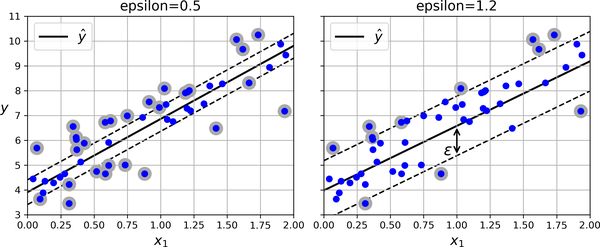

Giảm $\epsilon$ làm tăng support vector, giúp điều chỉnh mô hình. Thêm nữa, nếu thêm nhiều trường hợp đào tạo hơn trong phạm vi biên, điều này sẽ không ảnh hưởng đến dự đoán của mô hình. Do đó mô hình được cho là $\epsilon-insensitive$

In [21]:
from sklearn.svm import LinearSVR

# extra code – these 3 lines generate a simple linear dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg.fit(X, y)

svm_reg.predict([[1.5]])

array([7.88029452])

In [22]:
from sklearn.svm import SVR

# extra code – these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

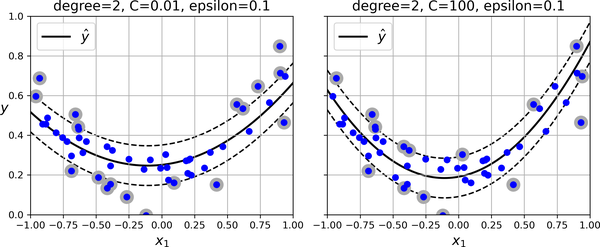

# Under the Hood of Linear SVM Classifiers

Linear SVM Classifiers dự đoán một instance mới $\mathbf{x}$ bằng cách tính $\mathbf{\theta}^T \mathbf{x}$. Nếu kết quả dương thì là positive class và ngược lại.

Về đào tạo việc này đòi hỏi phải tìm vector trọng số $\mathbf{w}$ và bias $b$ làm cho street, hay margin rộng nhất có thể trong khi hạn chế số lượng margin violations. Để làm cho nó lớn hơn cần $\mathbf{w}$ nhỏ hơn

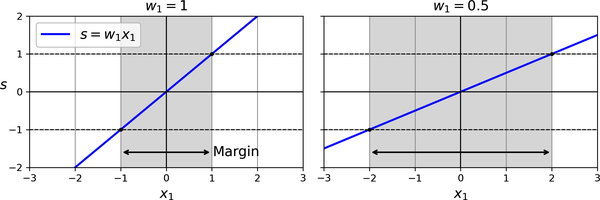

Giả sử định nghĩa ranh giới của street là điểm mà hàm quyết định bằng 1 hoặc -1. Do đó $w_1 = 1$ chiều rộng = 2, $w_1 = 0.5$ chiều rộng bằng 4. Vì vậy phải giữ $\mathbf{w}$ nhỏ nhất có thể. 

Ta cần phải tránh margin violations. Vì vậy ta cần decision_function lớn hơn 1 đổi với các positive instances và nhỏ hơn -1 với negative instances. Đặt $t^{(i)}=-1$ cho negative instances (khi $y^{(i)} = 0$) và $t^{(i)}=1$ (khi $y^{(i)} = 1$) ta có được biểu thức $t^{(i)} (\mathbf{w}^T\mathbf{x}^{(i)} + b) >= 1$ cho tất cả instances

Chúng ta có thể biểu thị mục tiêu cho hard margin linear SVM bằng công thức sau

$\operatorname{minimize}_{w,b} \ \ \frac{1}{2} \mathbf{w}^T \mathbf{w}$

$\operatorname{subject to} \ t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b) >=  1 \operatorname{for} i = 1,2, ..., m$ 

Đối với mục tiêu soft margin, chúng ta cần thêm *slack variable $\zeta^{(i)} \geq 0$* cho mỗi instance. $\zeta^{(i)}$  đo lường mức độ instance $i^{th}$ được phép vi phạm biên độ, ta có 2 mục tiêu xung đột nhau: làm slack variable nhỏ nhất có thể để giảm margin violation, và làm $1/2 \mathbf{w}^T\mathbf{w}$ nhỏ nhất có thể để tăng margin. Hyperparameter C để chúng ta điều chỉnh mức độ ảnh hưởng của 2 mục tiêu này

Chúng ta có thể biểu thị mục tiêu cho soft margin linear SVM bằng công thức sau

$\operatorname{minimize}_{w,b, \zeta} \ \ \frac{1}{2} \mathbf{w}^T \mathbf{w} + C \sum_{i=1}^m \zeta^{(i)}$

$\operatorname{subject to} \ t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b) >=  1 - \zeta^{(i)} \operatorname{for} i = 1,2, ..., m$ 

Sử dụng QP solver là một cách để huấn luyện SVM. Một cách khác là sử dụng GD để giảm thiểu *hinge loss* hoặc *squared hinge loss*. Cho một instance $\mathbf{x}$ thuộc class positive, loss = 0 nếu output $s$ của decision function $(s = \mathbf{w}^T\mathbf{x} + b)$ lớn hơn hoặc bằng 1. và ngược lại cho một instance thuộc class negative, loss = 0 nếu $s$ nhỏ hơn bằng -1. Càng xa một instance nằm về phía đúng của biên loss càng lớn, nó tăng tuyến tính với hinge loss và tăng theo cấp số nhân với squared hinge loss. Tuy nhiên nếu dataset clean, nó sẽ hội tụ nhanh hơn.

Mặc định, LinearSVC sử dụng squared hinge loss, trong khi SGDClassifier sử dụng hinge loss. Cả hai đều có thể được điều chỉnh bằng hyperparameter `loss` với các tùy chọn là `hinge` hoặc `squared_hinge`

# Exercises

## 1

**Question: What is the fundamental idea behind support vector machines ?**

Ý tưởng cơ bản đằng sau Support Vector Machine là tạo ra "street" giữa các classes. Nói cách khác mục tiêu là có margin (biên độ) lớn nhất có thể giữa decicion boundary phân tách hai lớp và các training instacnce. Khi thực hiện soft margin classification, SVM tìm kiếm sự đánh đổi giữa việc phân tách hoàn hảo hai classes và "street" rộng nhất có thể (một vài trường hợp có thể nằm trong street). Một ý tưởng quan trọng khác là sử dụng kernel khi training trên nonlinear datasets. SVM cũng có thể được điều chỉnh để thực hiện linear và nonlinear regression, cũng như phát hiện sự mới lạ (novelty detection).

## 2

**Question: What is a support vector?**

Sau khi đào tạo một mô hình SVM, một support vector là bất kỳ instance nào nằm trên `street` (các instance nằm trong và trên nét đứt). Decision boundary được xác định bởi các support vector. Bất kỳ instances nào không phải là support vector (nằm ngoài `street`) đều không có bất kỳ ảnh hưởng nào, ta có thể xóa, di chuyển thêm các instance miễn là nó nằm ngoài `street` thì decision boundary sẽ không ảnh hưởng. Việc tính toán các dự đoán bằng một SVM được kernel hóa chỉ liên quan đến các vectơ hỗ trợ, không phải toàn bộ trainging set.

## 3

**Question: Why is it important to scale the inputs when using SVMs?**

SVMs cố gắng fit với "street" lớn nhất có thể giữa các classes, vì vậy nếu training set không được chia tỉ lệ, các feature nhỏ sẽ có xu hướng bị bỏ qua

## 4

**Question: Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?**

Sử dụng `decision_function()` để lấy điểm tin cậy. Điểm số này đại diện cho khoảng cách giữa instance và decision boundary. Tuy nhiên nó không thể chuyển trực tiếp thành xác suất lớp. Nếu đặt `probability=True` khi sử dụng SVC, sau đó khi kết thúc training dùng 5-fold cross-validation để tạo điểm số out-of-sample cho training samples, và nó sẽ train một `LogisticRegression` để gán các giá trị điểm xác suất ước tính. Sau đó, các phương thức `predict_proba()` và `predict_log_proba()` sẽ khả dụng.

## 5

**Question: How can you choose between LinearSVC, SVC, and SGDClassifier?**

Cả 3 class đểu dùng để phân loại linear large-margin. 

Lớp `SVC` cũng hỗ trợ kernel trick, giúp nó có khả năng xử lí các tác vụ phi tuyến tính. Tuy nhiên `SVC` không mở rộng tốt với các bộ dữ liệu lớn. Tuy nhiên nó mở rộng tốt với bộ dữ liệu có nhiều feature.

Lớp `LinearSVC` triển khai thuật toán đã tối ưu cho linear SVMs, trong khi `SGDClassifiers` sử dụng SGD. Tùy thuộc vào tập dữ liệu, LinearSVC có thể nhanh hơn một chút so với SGDClassifier, nhưng không phải lúc nào cũng vậy, và SGDClassifier linh hoạt hơn, cộng với việc nó hỗ trợ học gia tăng.

## 6

**Question: Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you
increase or decrease γ (gamma)? What about C?**

Nếu một `SVM Classifier` được train với một `kernel RBF` underfit với training set, có thể có quá nhiều regularization. Để giảm nó, bạn cần tăng gamma hoặc C (hoặc cả hai).

## 7

**Question: What does it mean for a model to be ϵ-insensitive?**

Một mô hình `Regression SVM` cố gắng đưa càng nhiều instance vào một biên độ nhỉ xung quanh đường dự đoán của nó. Nếu thêm các instance vào bên trong biên độ này, mô hình không bị ảnh hường thì gọi là `ϵ-insensitive`

## 8

**Question: What is the point of using the kernel trick?**

Kernel trick là mọt kỹ thuật toán học giúp ta train được các mô hình `nonlinear SVM`. Mô hình kết quả tương đương với việc ánh xạ các đầu vào sang một không gian khác bằng cách sử dụng phép biến đổi phi tuyến tính, sau đó đào tạo `linear SVM` trên kết quả là các đầu vào high-dimensional.

## 9


**Question: Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.**

In [23]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # type: ignore
y = iris.target # type: ignore

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Now let's build and train 3 models:
* Remember that `LinearSVC` uses `loss="squared_hinge"` by default, so if we want all 3 models to produce similar results, we need to set `loss="hinge"`.
* Also, the `SVC` class uses an RBF kernel by default, so we need to set `kernel="linear"` to get similar results as the other two models.
* Lastly, the `SGDClassifier` class does not have a `C` hyperparameter, but it has another regularization hyperparameter called `alpha`, so we can tweak it to get similar results as the other two models.

In [24]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

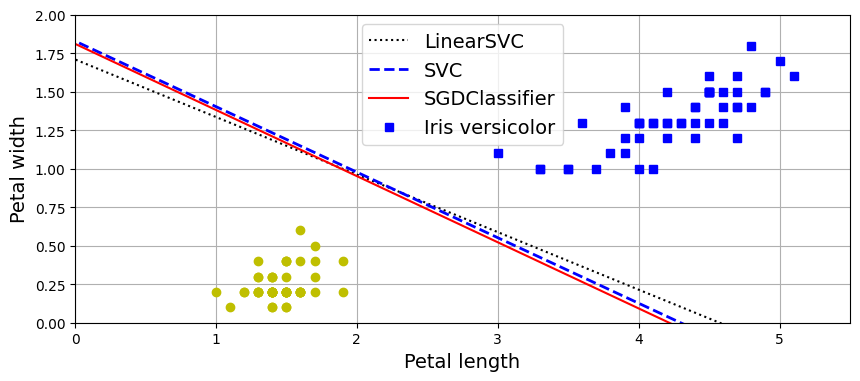

In [25]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

plt.figure(figsize=(10, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis((0, 5.5, 0, 2))
plt.grid()

plt.show()

## 10

**Question: Train an SVM classifier on the wine dataset, which you can load using `sklearn.datasets.load_wine()`. This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?**

In [26]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [27]:
print(wine.DESCR) # type: ignore

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42 # type: ignore
)

In [29]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [30]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

In [31]:
lin_clf = LinearSVC(dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, random_state=42)

In [32]:
# failed to converge, try increasing the number of iterations
lin_clf = LinearSVC(max_iter=1_000_000, dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, max_iter=1000000, random_state=42)

Sau 1 triệu vòng lặp vẫn chưa hội tụ. Cần xem xét các vấn đề khác, trước hết tính `cross_val_score` của mô hình.

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf, X_train, y_train).mean()

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


np.float64(0.90997150997151)

91% là kết quả chưa tốt

**Always remember to scale the features when using SVMs:**

In [34]:
lin_clf = make_pipeline(
    StandardScaler(), LinearSVC(dual=True, random_state=42))

lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=True, random_state=42))])

In [35]:
cross_val_score(lin_clf, X_train, y_train).mean()

np.float64(0.9774928774928775)

In [36]:
cross_val_score(lin_clf, X_test, y_test).mean()

np.float64(0.9777777777777779)

In [37]:
lin_clf.score(X_test, y_test)

0.9777777777777777

In [38]:
# Let's see if a kernelized SVM will do better.

svm_clf = make_pipeline(
    StandardScaler(), 
    SVC(random_state=42)
)

cross_val_score(svm_clf, X_train, y_train).mean()

np.float64(0.9698005698005698)

In [39]:
# fine tune the hyperparameters using RandomizedSearchCV
import re
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

param_distrib = {
    "svc__gamma": loguniform(1e-3, 1e-1),
    "svc__C": uniform(1, 10)
}

rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=np.float64(9.925589984899778),
                     gamma=np.float64(0.011986281799901188),
                     random_state=42))])

In [40]:
rnd_search_cv.best_score_

np.float64(0.9925925925925926)

In [41]:
rnd_search_cv.score(X_test, y_test)

0.9777777777777777

***This tuned kernelized SVM performs better than the `LinearSVC` model, but we get a lower score on the test set than we measured using cross-validation. This is quite common: since we did so much hyperparameter tuning, we ended up slightly overfitting the cross-validation test sets. It's tempting to tweak the hyperparameters a bit more until we get a better result on the test set, but this would probably not help, as we would just start overfitting the test set. Anyway, this score is not bad at all, so let's stop here.***

## 11

**Question: Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using `sklearn.datasets.fetch_california_housing()`. The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model’s RMSE?**

In [42]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X = housing.data # type: ignore
y = housing.target # type: ignore

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

y_train.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64

In [44]:
from sklearn.svm import LinearSVC

lin_svr = make_pipeline(
    StandardScaler(),
    LinearSVR(dual=True, random_state=42)
)
lin_svr.fit(X_train, y_train)

c:\Users\PC\anaconda3\envs\ml_learning\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(dual=True, random_state=42))])

In [45]:
# try increase max_iter
lin_svr = make_pipeline(StandardScaler(),
                        LinearSVR(max_iter=5000, dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=5000, random_state=42))])

In [53]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error


y_pred = lin_svr.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
rmse


0.9795654478293855

In [54]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025DAD7F5B70>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025DAD7F49D0>},
                   random_state=42)

In [57]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr',
                 SVR(C=np.float64(4.63629602379294),
                     gamma=np.float64(0.08781408196485979)))])

In [58]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.58834964, 0.57468024, 0.58084857, 0.57109511, 0.59853088])

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.5854732265172243

: 

Tốt hơn SVM